In [83]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
import xgboost as xgb
from xgboost import plot_importance

In [84]:
# Read dataset
df = pd.read_csv('heart-disease-uci//heart.csv', sep = ',')

In [85]:
# Head
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211703133C8>,
      dtype=object)

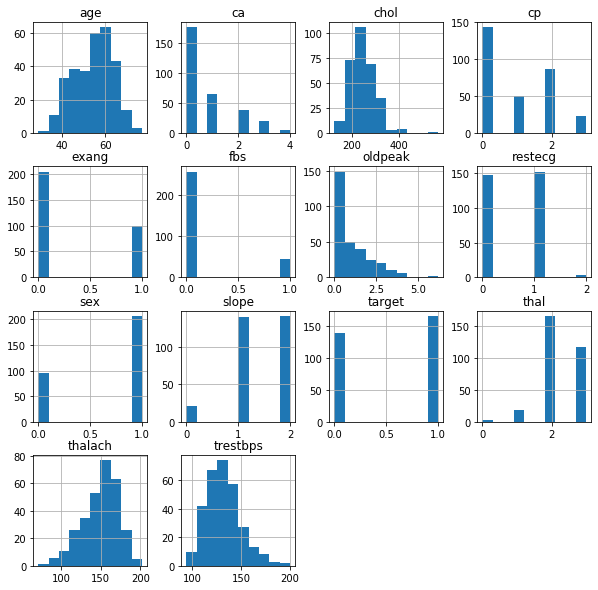

In [86]:
# Variables behaviour
df.hist(figsize=(10,10))

In [87]:
# Check balanced data
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [88]:
# Get dependent and independent variables
y = df['target']
X = df.loc[:, df.columns != 'target']

In [89]:
# Train and valid
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.3)

In [90]:
# Using repeat k fold for better splits
xb_acc = []
xb_auc = []
xb_f1 = []
log_acc = []
log_auc = []
log_f1 = []
dec_acc = []
dec_auc = []
dec_f1 = []
kf = RepeatedKFold(n_splits=2, n_repeats=30, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    model=xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.2,max_depth = 5, alpha = 10, n_estimators = 200)
    log = LogisticRegression(max_iter = 10000)
    dec = DecisionTreeClassifier()
    
    model.fit(X_treino, y_treino)
    p_xg = model.predict(X_valid)
    acc = np.mean(y_valid == p_xg)
    xb_acc.append(acc)
    xb_auc.append(roc_auc_score(y_valid, p_xg))
    xb_f1.append(f1_score(y_valid, p_xg))
    
    log.fit(X_treino, y_treino)
    p_log = log.predict(X_valid)
    acc = np.mean(y_valid == p_log)
    log_acc.append(acc)
    log_auc.append(roc_auc_score(y_valid, p_log))
    log_f1.append(f1_score(y_valid, p_log))
    
    dec.fit(X_treino, y_treino)
    p_dec = dec.predict(X_valid)
    acc = np.mean(y_valid == p_dec)
    dec_acc.append(acc)
    dec_auc.append(roc_auc_score(y_valid, p_dec))
    dec_f1.append(f1_score(y_valid, p_dec))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021172B5F3C8>,
      dtype=object)

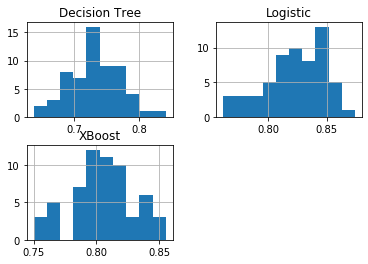

In [107]:
# Accuracy
acc = {"XBoost": xb_acc, "Logistic": log_acc, "Decision Tree": dec_acc }
acc = pd.DataFrame(acc, columns = ['XBoost', 'Logistic', 'Decision Tree'])
acc.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021172CDE828>,
      dtype=object)

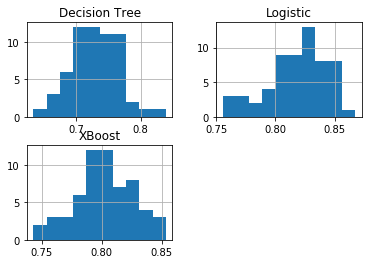

In [108]:
# Auc
auc = {"XBoost": xb_auc, "Logistic": log_auc, "Decision Tree": dec_auc }
auc = pd.DataFrame(auc, columns = ['XBoost', 'Logistic', 'Decision Tree'])
auc.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021172E49C18>,
      dtype=object)

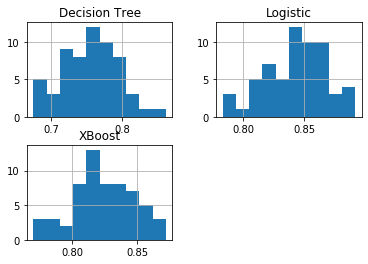

In [109]:
# F1 Score
f1 = {"XBoost": xb_f1, "Logistic": log_f1, "Decision Tree": dec_f1 }
f1 = pd.DataFrame(f1, columns = ['XBoost', 'Logistic', 'Decision Tree'])
f1.hist()

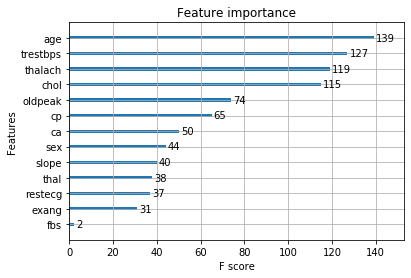

In [110]:
# Variables most important for the model
plot_importance(model)